In [66]:
import sqlite3

from main import setup1, setup2

# setup1()
# setup2()

# from django.db import connection 

import psycopg2

In [67]:
from notebook_utils.queries import run_query, run_query_file

In [68]:
import matplotlib.pyplot as plt 
import numpy as np

query_1 = '''
    SELECT
        name, numplayers
    FROM
        player_game_pair
    GROUP BY
        name, numplayers
    ORDER BY
        name, numplayers
    '''

players = run_query(
    query_1
)
print(players)
print(f"{len(players)} number of players")
def make_graph_for(player, ax, mx = 100):
    name, numplayers = player
    query_1 = '''
        SELECT
            number_of_turns
        FROM
            player_with_numturns
        WHERE name = '{}' AND numplayers = {}        
        
        '''.format(name, numplayers)

    data= run_query(
        query_1
    )
    data = [i[0] for i in data]
    # Define the bin edges for groups of 5
    bin_size = 2
    # mx = max(data)
    # mx = 100
    bin_edges = range(0, mx + bin_size, bin_size)

    # Create histogram
    ax.hist(data, bins=bin_edges, edgecolor='black')

    # Add titles and labels
    ax.set_title(f'{name}, {numplayers} players')
    
    # ax.xlabel('Value Range')
    # ax.ylabel('Frequency')



[('NewBiggestFirst', 1), ('NewBiggestFirst', 2), ('NewBiggestFirst', 3), ('Replacement', 1), ('Replacement', 2), ('Replacement', 3), ('Tunnels', 1), ('Tunnels', 2), ('Tunnels', 3)]
9 number of players


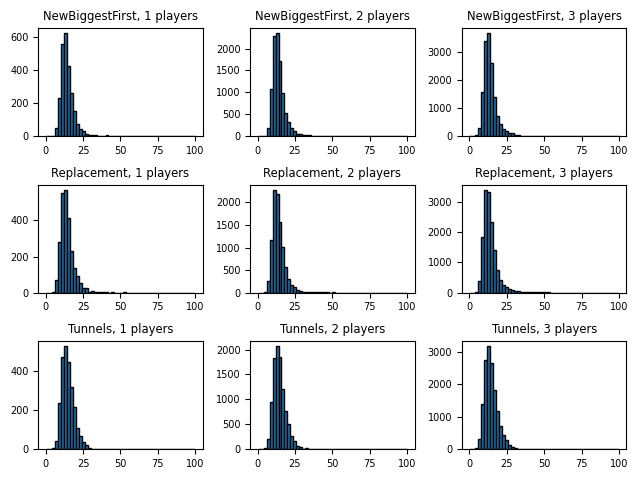

In [69]:
fig, ax = plt.subplots(3, 3)
# plt.subplots_adjust(wspace=2, hspace=2)

for i in range(3):
    for j in range(3):
        make_graph_for(players[3*i + j], ax[i][j])
        
plt.tight_layout()

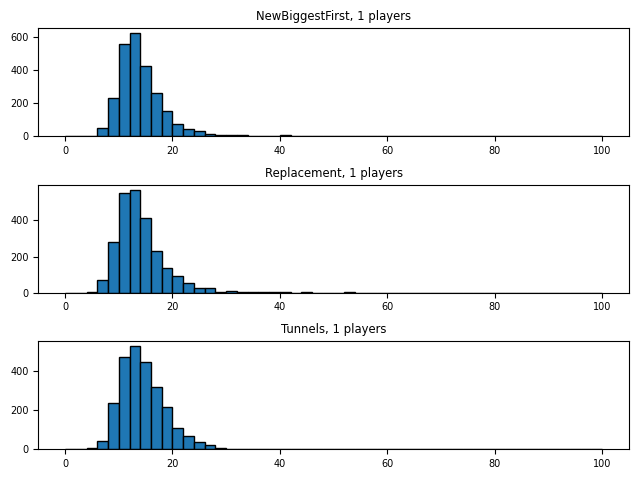

In [70]:
import matplotlib
matplotlib.rc('font', family='sans-serif') 
matplotlib.rc('font', serif='Roboto') 
matplotlib.rc('text', usetex='false') 
matplotlib.rcParams.update({'font.size': 7})
fig, ax = plt.subplots(3)
# plt.subplots_adjust(wspace=2, hspace=2)

for i in range(3):
    make_graph_for(players[3*i], ax[i])
        
plt.tight_layout()

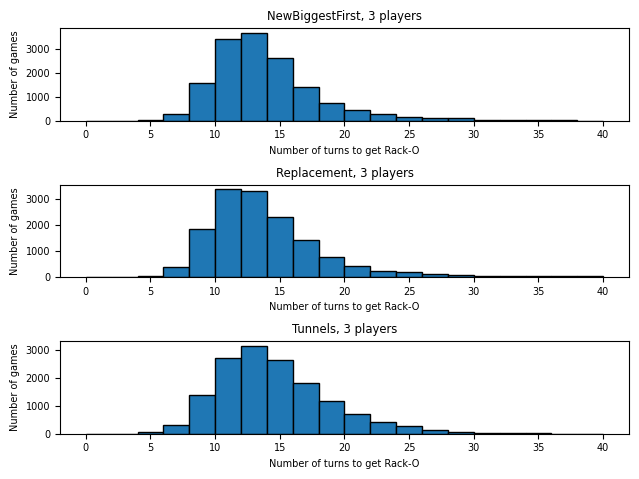

In [71]:
fig, ax = plt.subplots(3)
# plt.subplots_adjust(wspace=2, hspace=2)

for i in range(3):
    make_graph_for(players[3*i+2], ax[i], mx = 40)
    ax[i].set_xlabel('Number of turns to get Rack-O')
    ax[i].set_ylabel('Number of games')
plt.tight_layout()

In [72]:
from notebook_utils.dataframes import get_df



In [73]:

# Get summary statistics
df = get_df()
statistics = df.groupby(['name', 'numplayers']).describe()
statistics

numturns                                         \
                              count       mean        std  min   25%   50%   
name            numplayers                                                   
NewBiggestFirst 1            2500.0  13.606000   4.364675  4.0  11.0  13.0   
                2           10000.0  13.553600   4.577862  4.0  11.0  13.0   
                3           15000.0  13.553733   4.694868  2.0  11.0  13.0   
Replacement     1            2500.0  13.732000   5.728639  4.0  11.0  13.0   
                2           10000.0  14.060600   8.934781  4.0  10.0  13.0   
                3           15000.0  14.529800  14.046470  2.0  10.0  13.0   
Tunnels         1            2500.0  14.024000   4.321075  5.0  11.0  13.0   
                2           10000.0  14.108400   4.406676  4.0  11.0  13.0   
                3           15000.0  14.132733   4.428336  2.0  11.0  13.0   

                                         
                             75%    max  
name            numplayers               
NewBiggestFirst 1           15.0   43.0  
                2           15.0   67.0  
                3           15.0  112.0  
Replacement     1           15.0   90.0  
                2           16.0  306.0  
                3           15.0  845.0  
Tunnels         1           16.0   46.0  
                2           16.0   43.0  
                3           16.0   48.0

In [74]:

"""select name, count(game_id) from (SELECT
        count(turns.id) as number_of_turns,
        turns.game_id as game_id,
        player.name as name,
        turns.turn_type as type
    FROM
        db_player as player
    JOIN 
        db_turn as turns ON turns.player_id = player.id
    GROUP BY
        turns.game_id,
        turns.player_id,
        turns.turn_type
        ) where number_of_turns > 100 GROUP BY name"""


'select name, count(game_id) from (SELECT\n        count(turns.id) as number_of_turns,\n        turns.game_id as game_id,\n        player.name as name,\n        turns.turn_type as type\n    FROM\n        db_player as player\n    JOIN \n        db_turn as turns ON turns.player_id = player.id\n    GROUP BY\n        turns.game_id,\n        turns.player_id,\n        turns.turn_type\n        ) where number_of_turns > 100 GROUP BY name'

In [75]:
import numpy as np
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h



In [76]:
from statistics import NormalDist

def confidence_interval(data, confidence=0.95):
  dist = NormalDist.from_samples(data)
  z = NormalDist().inv_cdf((1 + confidence) / 2.)
  h = dist.stdev * z / ((len(data) - 1) ** .5)
  return dist.mean - h, dist.mean + h



In [77]:
'''
 * ( ) record computational time
 * ( ) Higher computational time will correlate with game performance (# turns to win)
 * ( ) Having the first turn will correlate with win %
 * ( ) Lower # cards drawn and immediately discarded will correlate with lower # turns to win (better game performance)
 * ( ) Higher # discards used will correlate with lower # turns to win (better game performance)
 * (✓) Replacement will outperform Tunnels which will outperform BiggestFirst
'''

'\n * ( ) record computational time\n * ( ) Higher computational time will correlate with game performance (# turns to win)\n * ( ) Having the first turn will correlate with win %\n * ( ) Lower # cards drawn and immediately discarded will correlate with lower # turns to win (better game performance)\n * ( ) Higher # discards used will correlate with lower # turns to win (better game performance)\n * (✓) Replacement will outperform Tunnels which will outperform BiggestFirst\n'

In [78]:
from notebook_utils.dataframes import get_stats_df
import pandas as pd


In [2]:
from notebook_utils.graphs.scatterplots import comp_time_scatterplot

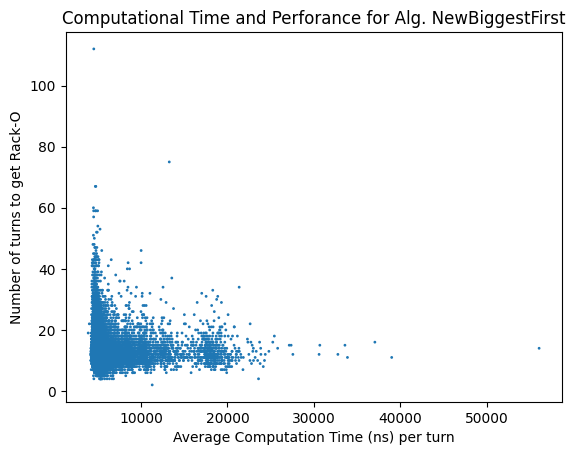

In [3]:
comp_time_scatterplot(name='NewBiggestFirst')

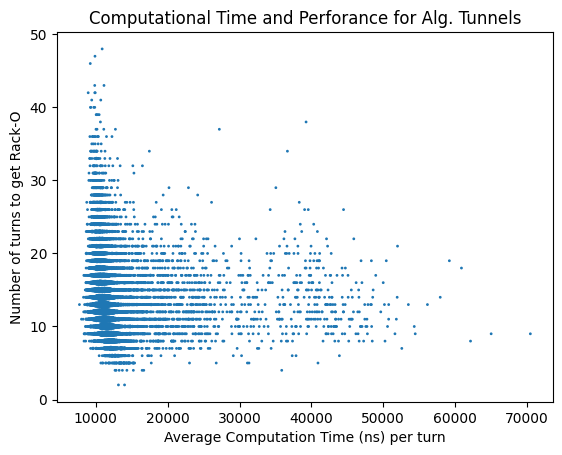

In [4]:
comp_time_scatterplot(name='Tunnels')

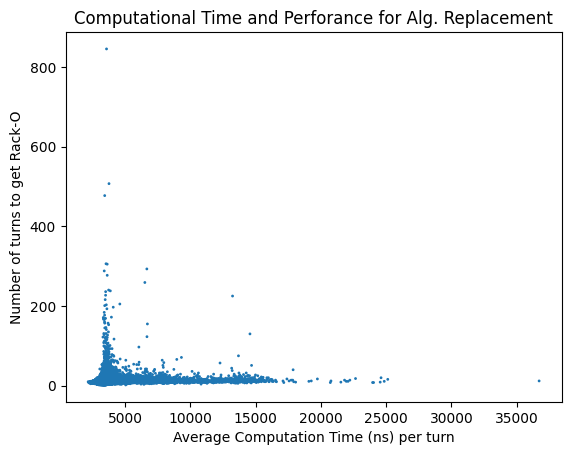

In [5]:
comp_time_scatterplot(name='Replacement')

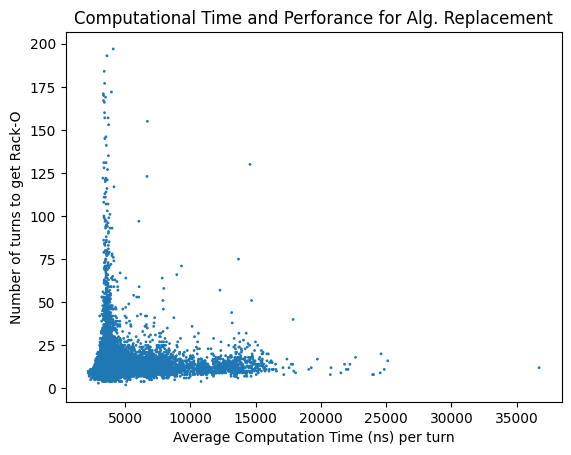

In [6]:
comp_time_scatterplot(name='Replacement', max_turns=200)

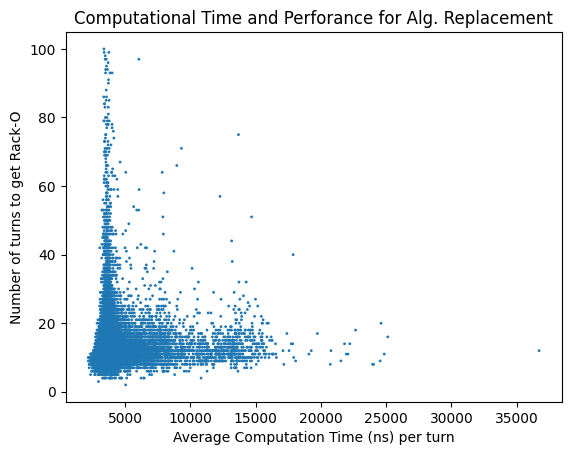

In [7]:
comp_time_scatterplot(name='Replacement', max_turns=100)

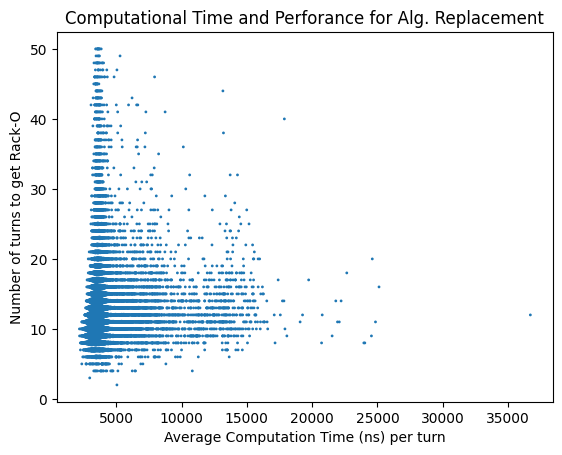

In [8]:
comp_time_scatterplot(name='Replacement', max_turns=50)

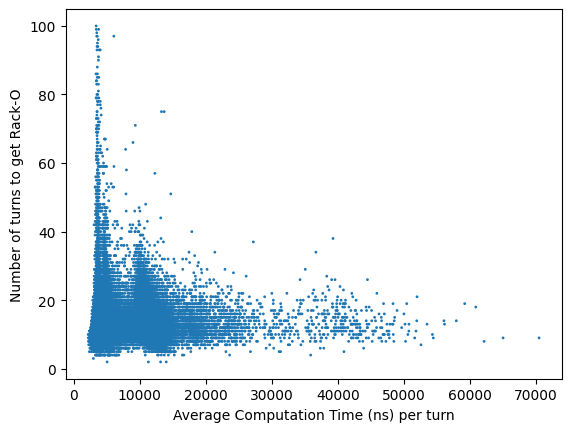

In [8]:
comp_time_scatterplot(max_turns=100)